## Set-up

In [5]:
import tifffile
from pathlib import Path
from matplotlib import colormaps as cm
from glob import glob

from matplotlib import pyplot as plt

import scipy as sp
from scipy.constants import Boltzmann as KB

import pandas as pd
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import utils
import track

### Parameters

In [6]:
input_path = r'/home/gideon/Documents/PhD/Projects/KAW/output' # Change this to where you have the output saved

visc = 1.0016*10**-3 #Pa/s
T = 293 #temp in kelvin

def calculate_radius(diffusion_coefficient, viscosity=visc, temperature=T):
    return (KB*temperature)/(6*np.pi*viscosity*diffusion_coefficient) # radius in m


In [7]:
tracks = track.load_trajectories(f"{input_path}/tracks.csv")
tracks.head(-1)

,set,frame,y,x,entity,delta_y,delta_x,traveled_y,traveled_x,frame_count,t
0,0,0.0,65.692637,103.795197,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0,0.0,117.759525,114.591361,2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0,0.0,66.500037,126.216398,3.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0,1.0,67.198520,103.920286,1.0,1.505883,0.125090,1.505883,0.125090,1.0,0.450146
4,0,1.0,119.531687,114.843728,2.0,1.772162,0.252367,1.772162,0.252367,1.0,0.450146
...,...,...,...,...,...,...,...,...,...,...,...
2078,1,493.0,94.833020,16.197402,76.0,-1.025584,0.003906,11.909140,0.683168,12.0,0.826052
2079,1,494.0,92.847060,16.276048,76.0,-1.985959,0.078646,13.895099,0.761813,13.0,0.894890
2080,1,495.0,92.176020,16.156372,76.0,-0.671041,-0.119676,14.566140,0.881489,14.0,0.963727
2081,1,496.0,90.839740,16.237243,76.0,-1.336280,0.080871,15.902420,0.962360,15.0,1.032565


## Calculate Diffusitivity

In [8]:
tracks = tracks.sort_values(by=['set', 'entity', 'frame'])

tracks['r'] = np.sqrt(tracks['traveled_x']**2 + tracks['traveled_y']**2)
diff = np.diff(tracks['r'])
tracks['MSD(t)'] = (tracks['r']**2)#/(tracks['frame_count']+1)

set0 = tracks[tracks['set']==1]
entity1 = set0[set0['entity']==10]


entity1.head(-1)


,set,frame,y,x,entity,delta_y,delta_x,traveled_y,traveled_x,frame_count,t,r,MSD(t)
485,1,75.0,96.450399,102.794958,10.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
493,1,76.0,95.431004,102.534693,10.0,-1.019396,-0.260265,1.019396,0.260265,1.0,0.068838,1.052096,1.106906
500,1,77.0,94.043024,102.517850,10.0,-1.387980,-0.016842,2.407376,0.277108,2.0,0.137675,2.423272,5.872247
507,1,78.0,92.718634,102.384358,10.0,-1.324390,-0.133493,3.731765,0.410600,3.0,0.206513,3.754286,14.094665
517,1,79.0,91.566725,102.473406,10.0,-1.151909,0.089049,4.883675,0.499649,4.0,0.275351,4.909168,24.099928
526,1,80.0,90.110487,102.451556,10.0,-1.456238,-0.021850,6.339913,0.521499,5.0,0.344188,6.361325,40.466455
536,1,81.0,88.910102,102.468758,10.0,-1.200384,0.017201,7.540297,0.538700,6.0,0.413026,7.559516,57.146277
554,1,83.0,87.582438,102.681309,10.0,-1.327664,0.212552,8.867961,0.751252,8.0,0.550701,8.899726,79.205117
571,1,85.0,85.069351,102.617678,10.0,-2.513088,-0.063632,11.381049,0.814883,10.0,0.688377,11.410184,130.192307
582,1,86.0,84.006032,102.490091,10.0,-1.063319,-0.127586,12.444368,0.942470,11.0,0.757214,12.480005,155.750533


Text(0, 0.5, 'MSD(t)')

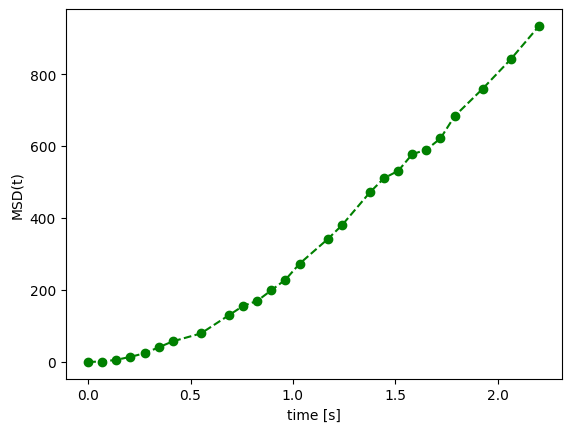

In [9]:
plt.plot(entity1['t'], entity1['MSD(t)'], marker='o', linestyle='--', color='g')
plt.xlabel('time [s]')
plt.ylabel('MSD(t)')



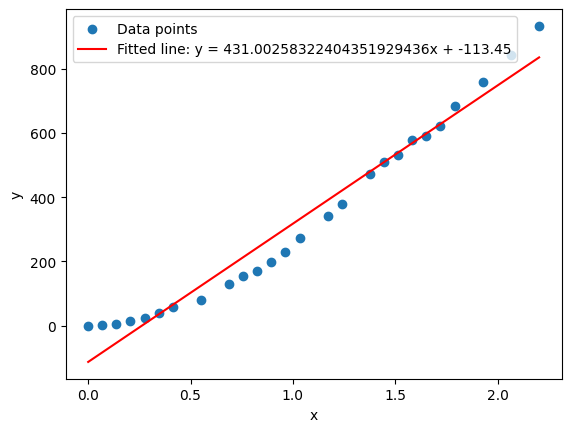

In [10]:
slope, intercept = np.polyfit(entity1['t'], entity1['MSD(t)'], 1)
y_fit = slope * entity1['t'] + intercept

plt.scatter(entity1['t'], entity1['MSD(t)'], label='Data points')
plt.plot(entity1['t'], y_fit, color='red', label=f'Fitted line: y = {slope:.20f}x + {intercept:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [11]:
r = calculate_radius(slope/4)
print(r)

1.9885457277770018e-21


## STD

In [12]:
tracks.head(-1)

,set,frame,y,x,entity,delta_y,delta_x,traveled_y,traveled_x,frame_count,t,r,MSD(t)
0,0,0.0,65.692637,103.795197,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0,1.0,67.198520,103.920286,1.0,1.505883,0.125090,1.505883,0.125090,1.0,0.450146,1.511069,2.283330
5,0,2.0,70.725640,103.783432,1.0,3.527120,-0.136854,5.033003,0.261944,2.0,0.900292,5.039815,25.399734
8,0,3.0,76.938919,103.783621,1.0,6.213278,0.000189,11.246281,0.262133,3.0,1.350438,11.249336,126.547559
11,0,4.0,76.436983,103.929101,1.0,-0.501936,0.145480,11.748217,0.407613,4.0,1.800584,11.755287,138.186762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1,493.0,94.833020,16.197402,76.0,-1.025584,0.003906,11.909140,0.683168,12.0,0.826052,11.928719,142.294326
2079,1,494.0,92.847060,16.276048,76.0,-1.985959,0.078646,13.895099,0.761813,13.0,0.894890,13.915967,193.654139
2080,1,495.0,92.176020,16.156372,76.0,-0.671041,-0.119676,14.566140,0.881489,14.0,0.963727,14.592788,212.949458
2081,1,496.0,90.839740,16.237243,76.0,-1.336280,0.080871,15.902420,0.962360,15.0,1.032565,15.931513,253.813098


(56, 13)
r_x = 2.1713588705902115e+31, r_y = 7.615321487987685e+28


/tmp/ipykernel_14601/3658269837.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(tracks[tracks['set']==set][tracks['entity']==entity].shape)
/tmp/ipykernel_14601/3658269837.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  std_x = tracks[tracks['set']==set][tracks['entity']==entity]['delta_x'].std()
/tmp/ipykernel_14601/3658269837.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  std_y = tracks[tracks['set']==set][tracks['entity']==entity]['delta_y'].std()
/tmp/ipykernel_14601/3658269837.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_x = tracks[tracks['set']==set][tracks['entity']==entity]['delta_x'].mean()
/tmp/ipykernel_14601/3658269837.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_y = tracks[tracks['set']==set][tracks['entity']==entity]['delta_y'].mean()
/tmp/ipykernel_14601/3658269837.py

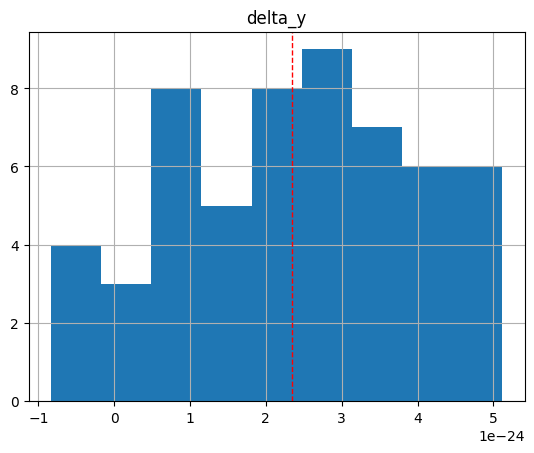

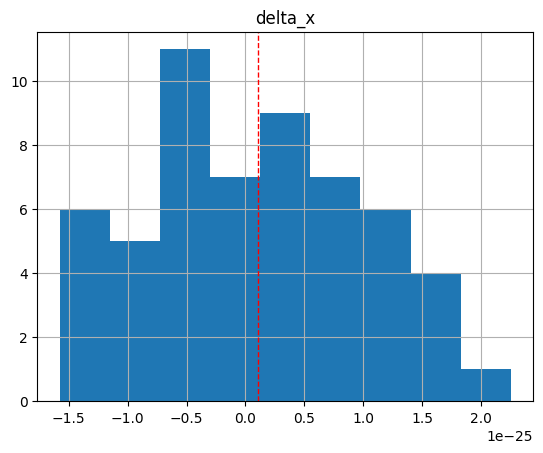

In [16]:
set = 0
entity = 43

print(tracks[tracks['set']==set][tracks['entity']==entity].shape)

tracks['delta_x'] = tracks['delta_x']*1e-6
tracks['delta_y'] = tracks['delta_y']*1e-6

# Calculate standard divation in both x and y to get the diffusion coefficient
std_x = tracks[tracks['set']==set][tracks['entity']==entity]['delta_x'].std()
std_y = tracks[tracks['set']==set][tracks['entity']==entity]['delta_y'].std()

# Calculate mean in both x and y to get the drift
mean_x = tracks[tracks['set']==set][tracks['entity']==entity]['delta_x'].mean()
mean_y = tracks[tracks['set']==set][tracks['entity']==entity]['delta_y'].mean()

#print(mean_x, std_x)
#print(mean_y, std_y)

# Einstein relation
d_x = (std_x)**2/(2*0.45)
d_y = (std_y)**2/(2*0.45)



# Plot the std and mean in x and y as well as the histogram
tracks[tracks['set']==set][tracks['entity']==entity].hist('delta_y', bins=9)
plt.axvline(mean_y, color='r', linestyle='dashed', linewidth=1)

# plot the normal distribution of y using the mean and std
#x = np.linspace(tracks[tracks['set']==set][tracks['entity']==entity]['delta_y'].min(), tracks[tracks['set']==set][tracks['entity']==entity]['delta_y'].max(), 100)
#plt.plot(x, sp.stats.norm.pdf(x, mean_y, std_y), color='r')


tracks[tracks['set']==set][tracks['entity']==entity].hist('delta_x', bins=9)
plt.axvline(mean_x, color='r', linestyle='dashed', linewidth=1)



# Langevin equation
r_x = calculate_radius((std_x)**2/(2*0.45))
r_y = calculate_radius((std_y)**2/(2*0.45))

print(f"{r_x = }, {r_y = }")

In [55]:
x_std = tracks.groupby(['set', 'entity'])['x'].std().reset_index()
y_std = tracks.groupby(['set', 'entity'])['y'].std().reset_index()

x_std['D'] = x_std['x']**2/(2*0.45)
y_std['D'] = y_std['y']**2/(2*0.45)

y_std.head(-1)

,set,entity,y,D
0,0,1.0,14.263218,226.043763
1,0,2.0,6.836241,51.926878
2,0,3.0,4.974975,27.500414
3,0,6.0,6.502263,46.977142
4,0,7.0,18.989099,400.650983
...,...,...,...,...
113,1,69.0,3.362401,12.561930
114,1,72.0,3.554676,14.039688
115,1,73.0,3.450855,13.231554
116,1,74.0,3.898167,16.884119
